# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
liquor = pd.read_csv("data/iowa.csv")
liquor

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50


In [10]:
liquor['Profit'] = (liquor['State Bottle Retail'] - liquor['State Bottle Cost']) * liquor['Bottles Sold']

profit_by_item = (
    liquor.groupby('Item Description')['Profit']
    .sum()
    .reset_index()
    .sort_values('Profit', ascending=False)
)

profit_by_item.head(10)

,Item Description,Profit
5022,TITOS HANDMADE VODKA,364074.35
636,BLACK VELVET,274676.85
1854,FIREBALL CINNAMON WHISKEY,187535.22
1323,CROWN ROYAL,160981.95
1358,CROWN ROYAL REGAL APPLE,122880.40
1022,CAPTAIN MORGAN SPICED RUM,121115.30
2349,HAWKEYE VODKA,116375.04
992,CAPTAIN MORGAN ORIGINAL SPICED,112146.71
2564,JACK DANIELS OLD #7 BLACK LABEL,111509.09
2376,HENNESSY VS,108459.45


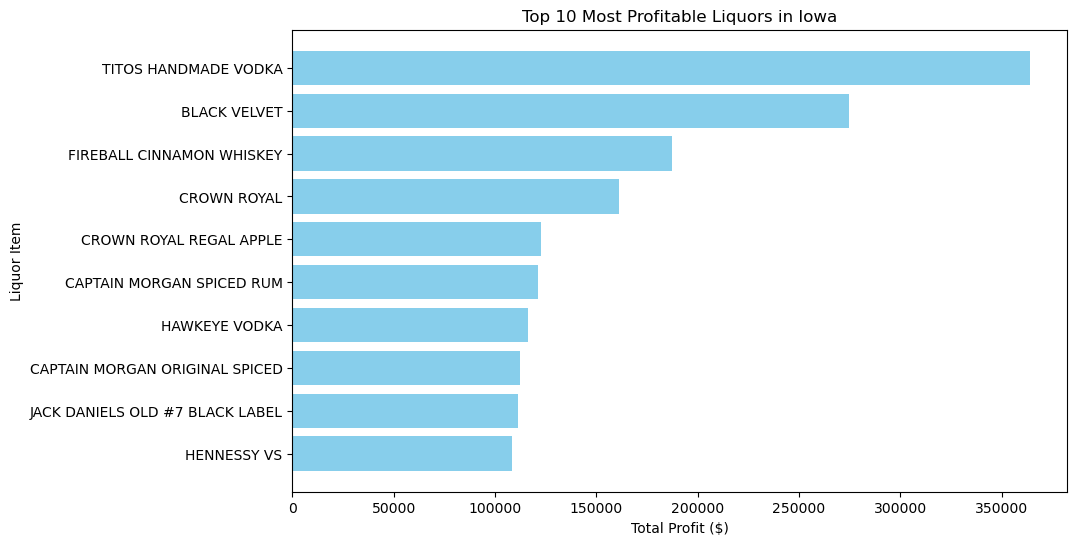

In [13]:
top10 = profit_by_item.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10['Item Description'], top10['Profit'], color='skyblue')
plt.xlabel("Total Profit ($)")
plt.ylabel("Liquor Item")
plt.title("Top 10 Most Profitable Liquors in Iowa")
plt.gca().invert_yaxis() 
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [14]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [ ]:
x - y #incompatible shapes

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
x.reshape(-1,1)-y.reshape(1,-1) #now produces column and row vectors, allowing compatible ops

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [ ]:
x.reshape(1,-1)-y.reshape(-1,1) #same thing here

array([[-1,  1,  3],
       [-4, -2,  0]])

In [20]:
x.reshape(1,-1)

array([[1, 3, 5]])

In [21]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

In [18]:
result1 = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        result1[i,j] = x[i] - y[j]
result1

array([[-1., -4.],
       [ 1., -2.],
       [ 3.,  0.]])

In [19]:
result2 = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        result2[i,j] = x[j] - y[i]
result2

array([[-1.,  1.,  3.],
       [-4., -2.,  0.]])

x.reshape(-1,1) turns it into a column vector shape (3,1), whereas x.reshape(1,-1) turns it into a row vector shape (1,3). The same applies to y

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

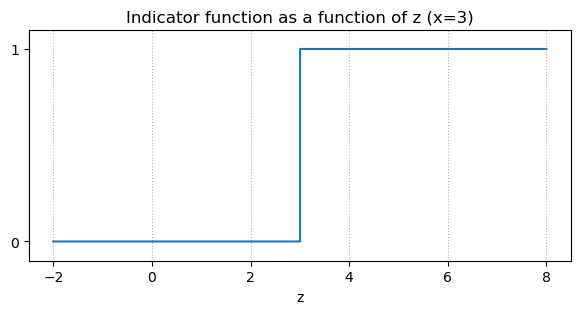

In [23]:
x = 3
z = np.linspace(-2, 8, 1000)

Ix_le_z = (x <= z).astype(int)

plt.figure(figsize=(7,3))
plt.step(z, Ix_le_z, where='post')
plt.ylim(-0.1, 1.1)
plt.yticks([0,1])
plt.xlabel("z")
plt.title("Indicator function as a function of z (x=3)")
plt.grid(True, which="both", axis="x", linestyle=":")
plt.show()

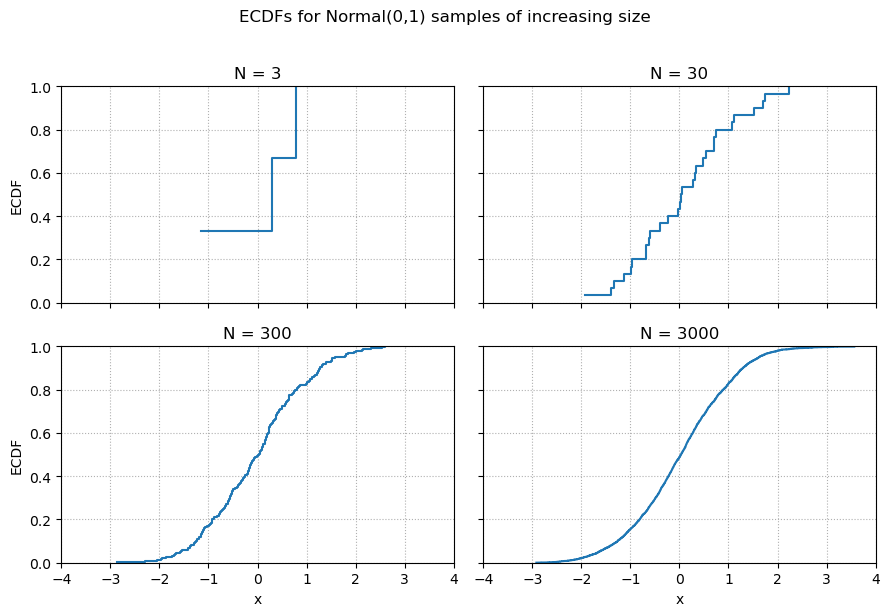

In [24]:
import numpy as np
import seaborn as sns

def ecdf(sample: np.ndarray):
    x = np.sort(sample)
    n = x.size
    y = np.arange(1, n+1) / n   
    return x, y

rng = np.random.default_rng(100)

Ns = (3, 30, 300, 3000)
fig, axes = plt.subplots(2, 2, figsize=(9,6), sharex=True, sharey=True)

for ax, N in zip(axes.ravel(), Ns):
    X = rng.normal(0, 1, N)
    x_ecdf, y_ecdf = ecdf(X)
    ax.step(x_ecdf, y_ecdf, where='post')
    ax.set_title(f"N = {N}")
    ax.grid(True, linestyle=":")
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 1)

fig.suptitle("ECDFs for Normal(0,1) samples of increasing size", y=1.02)
for ax in axes[:,0]: ax.set_ylabel("ECDF")
for ax in axes[1,:]: ax.set_xlabel("x")
plt.tight_layout()
plt.show()


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [36]:
#i actually made a class for this when we made the funcs in class, pls dont be mad

class edcf:
  def __init__(self, x):
    self.x = sorted(x)
    self.n = len(self.x)

  def quantile_pos(self, q: float) -> float:
    #qth quantile
    pos = round(q * (self.n - 1))
    return self.x[pos]

  def quantile(self, q: float) -> float:
    pos = q * (self.n - 1)
    lower = int(pos)
    upper = min(lower + 1, self.n - 1)
    weight = pos - lower
    return self.x[lower] * (1 - weight) + self.x[upper] * weight

  def iqr(self) -> float:
    return self.quantile(.75) - self.quantile(.25)

  def whiskers(self) -> tuple:
    return (self.quantile(.25) - 1.5 * self.iqr(), self.quantile(.75) + 1.5 * self.iqr())

  def outliers(self) -> list:
    lower, upper = self.whiskers()
    return [x for x in self.x if x < lower or x > upper]
  
  def maximum(self) -> float:
    return self.x[-1]

In [ ]:
liquor_prices = liquor['State Bottle Cost'].values
liquor_ecdf = edcf(liquor_prices)

In [35]:
q25 = liquor_ecdf.quantile(0.25)
q50 = liquor_ecdf.quantile(0.50)  # median
q75 = liquor_ecdf.quantile(0.75)
maximum = liquor_ecdf.maximum()
iqr = liquor_ecdf.iqr()
whisk_low, whisk_high = liquor_ecdf.whiskers()
outliers = liquor_ecdf.outliers()

print("Q1 (25%):", q25)
print("Median (50%):", q50)
print("Q3 (75%):", q75)
print("Maximum:", maximum)
print("IQR:", iqr)
print("Whiskers:", (whisk_low, whisk_high))
print("Outliers:", len(outliers), "values")

Q1 (25%): 5.78
Median (50%): 8.66
Q3 (75%): 13.25
Maximum: 2298.84
IQR: 7.47
Whiskers: (-5.425, 24.455)
Outliers: 9850 values


In [33]:
liquor['State Bottle Cost'].describe()
#yay they match

count    159904.000000
mean         10.980340
std          11.399802
min           0.000000
25%           5.780000
50%           8.660000
75%          13.250000
max        2298.840000
Name: State Bottle Cost, dtype: float64

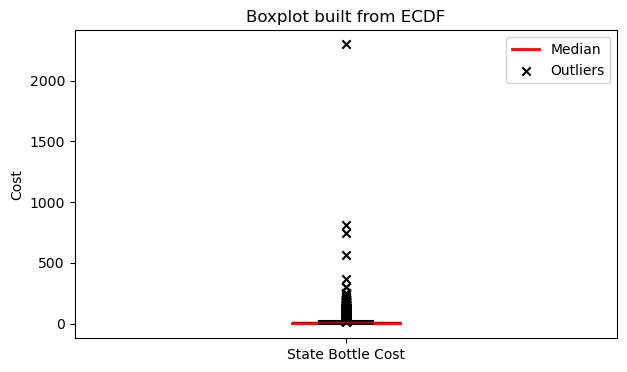

In [42]:
import matplotlib.pyplot as plt

# Build boxplot values from ecdf
q1 = liquor_ecdf.quantile(0.25)
q2 = liquor_ecdf.quantile(0.50)   # median
q3 = liquor_ecdf.quantile(0.75)
w_low, w_high = liquor_ecdf.whiskers()
outliers = liquor_ecdf.outliers()

fig, ax = plt.subplots(figsize=(7,4))

# draw box from Q1 to Q3
ax.add_patch(plt.Rectangle((0.9, q1), 0.2, q3-q1,
                           edgecolor="black", facecolor="lightblue"))

# median line
ax.plot([0.9, 1.1], [q2, q2], color="red", linewidth=2, label="Median")

# whiskers
ax.plot([1,1], [q1, w_low], color="black")
ax.plot([1,1], [q3, w_high], color="black")

# whisker caps
ax.plot([0.95,1.05], [w_low,w_low], color="black")
ax.plot([0.95,1.05], [w_high,w_high], color="black")

# outliers
ax.scatter([1]*len(outliers), outliers, color="black", marker="x", label="Outliers")

ax.set_xlim(0.5, 1.5)
ax.set_xticks([1])
ax.set_xticklabels(["State Bottle Cost"])
ax.set_ylabel("Cost")
ax.set_title("Boxplot built from ECDF")
ax.legend()
plt.show()


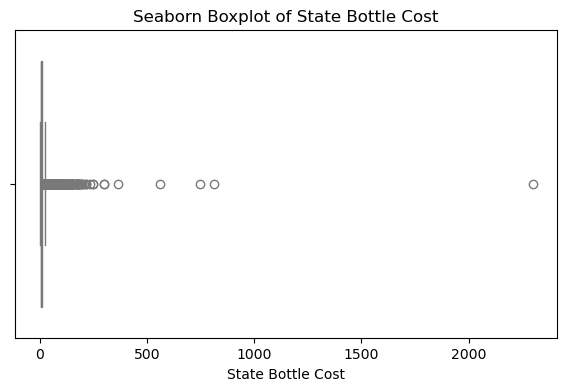

In [43]:
plt.figure(figsize=(7,4))
sns.boxplot(x=liquor['State Bottle Cost'], color="lightblue", whis=1.5, showfliers=True)
plt.title("Seaborn Boxplot of State Bottle Cost")
plt.xlabel("State Bottle Cost")
plt.show()

In [ ]:
#they match!

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?